<a href="https://colab.research.google.com/github/shubhamksingh1/Sentiment_Classification/blob/main/Notebooks/Sentiment_Classification_CNN_RNN_Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', 400)

## Install and Import Libraries

In [ ]:
# install hugging face transformers and datasets library
! pip install -q transformers datasets

     |████████████████████████████████| 5.8 MB 28.1 MB/s 
     |████████████████████████████████| 451 kB 68.3 MB/s 
     |████████████████████████████████| 182 kB 77.9 MB/s 
     |████████████████████████████████| 7.6 MB 65.2 MB/s 
     |████████████████████████████████| 212 kB 81.3 MB/s 
     |████████████████████████████████| 132 kB 77.5 MB/s 
     |████████████████████████████████| 127 kB 76.1 MB/s 


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 700)
from sklearn.utils import shuffle

## Load the Dataset

[SST5 Dataset](https://huggingface.co/datasets/SetFit/sst5)

In [ ]:
import re
import numpy as np 

In [ ]:
# hugging face load_dataset module to import sst5 dataset
from datasets import load_dataset

In [ ]:
df = load_dataset("SetFit/sst5")

Extracting data files #1:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #0:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #2:   0%|          | 0/1 [00:00<?, ?obj/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/SetFit___json/SetFit--sst5-4c07b9d5881ae209/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
df

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 8544
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2210
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1101
    })
})

In [ ]:
train_df = shuffle(pd.DataFrame(df['train'])).reset_index(drop=True)
test_df = shuffle(pd.DataFrame(df['test'])).reset_index(drop=True)
validation_df = shuffle(pd.DataFrame(df['validation'])).reset_index(drop=True)

## EDA

In [ ]:
train_df.label_text.value_counts()

positive         2322
negative         2218
neutral          1624
very positive    1288
very negative    1092
Name: label_text, dtype: int64

In [ ]:
test_df.label_text.value_counts()

negative         633
positive         510
very positive    399
neutral          389
very negative    279
Name: label_text, dtype: int64

In [ ]:
validation_df.label_text.value_counts()

negative         289
positive         279
neutral          229
very positive    165
very negative    139
Name: label_text, dtype: int64

In [ ]:
train_df.head(100)

,text,label,label_text
0,"the enjoyable undercover brother , a zany mix of saturday night live-style parody , '70s blaxploitation films and goofball action comedy gone wild , dishes out a ton of laughs that everyone can enjoy .",4,very positive
1,the film 's images give a backbone to the company and provide an emotional edge to its ultimate demise .,3,positive
2,"spreads itself too thin , leaving these actors , as well as the members of the commune , short of profound characterizations",0,very negative
3,the film 's needlessly opaque intro takes its doe-eyed crudup out of pre-9 \/ 11 new york and onto a cross-country road trip of the homeric kind .,1,negative
4,"halloween : resurrection is n't exactly quality cinema , but it is n't nearly as terrible as it cold have been .",2,neutral
5,the phone rings and a voice tells you you 've got seven days left to live .,2,neutral
6,"it 's all about anakin ... and the lustrous polished visuals rich in color and creativity and , of course , special effect .",4,very positive
7,"a surprisingly flat retread , hobbled by half-baked setups and sluggish pacing .",0,very negative
8,malone does have a gift for generating nightmarish images that will be hard to burn out of your brain .,2,neutral
9,"twenty years later , reggio still knows how to make a point with poetic imagery , but his ability to startle has been stifled by the very prevalence of the fast-forward technology that he so stringently takes to task .",2,neutral


In [ ]:
test_df.head(100)

,text,label,label_text
0,a film that takes you inside the rhythms of its subject : you experience it as you watch .,3,positive
1,"although it 's a bit smug and repetitive , this documentary engages your brain in a way few current films do .",3,positive
2,the situations and jokes are as predictable and as lowbrow as the endless pratfalls the boys take in their high heels .,1,negative
3,often moving and explores the discomfort inherent in the contacts between the american ` hosts ' and their ` guests . ',2,neutral
4,"a teasing drama whose relentless good-deed\/bad-deed reversals are just interesting enough to make a sinner like me pray for an even more interesting , less symmetrical , less obviously cross-shaped creation .",3,positive
5,the issue of faith is not explored very deeply,1,negative
6,"having never been a huge fan of dickens ' 800-page novel , it surprised me how much pleasure i had watching mcgrath 's version .",4,very positive
7,but some unexpected zigs and zags help .,3,positive
8,i regret to report that these ops are just not extreme enough .,1,negative
9,it 's a movie -- and an album -- you wo n't want to miss .,4,very positive


In [ ]:
validation_df.head(100)

,text,label,label_text
0,it 's a work by an artist so in control of both his medium and his message that he can improvise like a jazzman .,3,positive
1,it 's a lovely film with lovely performances by buy and accorsi .,3,positive
2,no one but a convict guilty of some truly heinous crime should have to sit through the master of disguise .,0,very negative
3,"we know the plot 's a little crazy , but it held my interest from start to finish .",3,positive
4,here 's yet another studio horror franchise mucking up its storyline with glitches casual fans could correct in their sleep .,0,very negative
5,a nightmare date with a half-formed wit done a great disservice by a lack of critical distance and a sad trust in liberal arts college bumper sticker platitudes .,1,negative
6,"there seems to be no clear path as to where the story 's going , or how long it 's going to take to get there .",1,negative
7,but what are adults doing in the theater at all ?,1,negative
8,a dumb movie with dumb characters doing dumb things and you have to be really dumb not to see where this is going .,1,negative
9,the movie is beautiful to behold and engages one in a sense of epic struggle -- inner and outer -- that 's all too rare in hollywood 's hastier productions .,4,very positive


In [ ]:
mapping_dict = {0 : "very negative",1: "negative",2 : "neutral", 3 : "positive", 4 :"very positive"}

In [ ]:
type(mapping_dict)

dict

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pickle


In [ ]:
labelBinary = LabelBinarizer()
labels = labelBinary.fit_transform(train_df['label_text'])


In [ ]:
labelBinary.classes_

array(['negative', 'neutral', 'positive', 'very negative',
       'very positive'], dtype='<U13')

In [ ]:
labelpath = '/content/drive/MyDrive/Sentiment_SST5/Output/label.pkl'
with open(labelpath, 'wb') as handle:
    pickle.dump(labelBinary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(labels.shape, train_df.shape)

(8544, 5) (8544, 3)


In [ ]:
labels

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
validation_df.head()

,text,label,label_text
0,it 's a work by an artist so in control of both his medium and his message that he can improvise like a jazzman .,3,positive
1,it 's a lovely film with lovely performances by buy and accorsi .,3,positive
2,no one but a convict guilty of some truly heinous crime should have to sit through the master of disguise .,0,very negative
3,"we know the plot 's a little crazy , but it held my interest from start to finish .",3,positive
4,here 's yet another studio horror franchise mucking up its storyline with glitches casual fans could correct in their sleep .,0,very negative


In [ ]:
val_labels = labelBinary.transform(validation_df['label_text'])

In [ ]:
val_labels.shape,validation_df.shape

((1101, 5), (1101, 3))

In [ ]:
val_labels

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
test_df.head()

,text,label,label_text
0,a film that takes you inside the rhythms of its subject : you experience it as you watch .,3,positive
1,"although it 's a bit smug and repetitive , this documentary engages your brain in a way few current films do .",3,positive
2,the situations and jokes are as predictable and as lowbrow as the endless pratfalls the boys take in their high heels .,1,negative
3,often moving and explores the discomfort inherent in the contacts between the american ` hosts ' and their ` guests . ',2,neutral
4,"a teasing drama whose relentless good-deed\/bad-deed reversals are just interesting enough to make a sinner like me pray for an even more interesting , less symmetrical , less obviously cross-shaped creation .",3,positive


In [ ]:
test_labels = labelBinary.transform(test_df['label_text'])

In [ ]:
test_labels.shape,test_df.shape

((2210, 5), (2210, 3))

In [ ]:
test_labels

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]])

## Download & Load Word Vectors for Embedding (Glove)


* Download and extract word vectors Glove



In [ ]:
# %%time
import zipfile
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip
zip_file = zipfile.ZipFile('glove.840B.300d.zip')
zip_file.extractall()

--2022-12-11 09:31:05--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2022-12-11 09:31:05--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2022-12-11 09:31:06--  https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/

In [ ]:
# !cp /content/glove.840B.300d.txt /content/drive/MyDrive/Embeddings/Glove/

* Load Word vectors in memory

In [ ]:
%%time

from tqdm.notebook import tqdm
import numpy as np 
 
def get_coefs(word, *arr):
    try:
        return word, np.asarray(arr, dtype='float32')
    except:
        return None, None

# embedding_path = '/content/drive/MyDrive/Embeddings/Glove/glove.840B.300d.txt'
embedding_path = '/content/glove.840B.300d.txt'
embeddings_index = dict(get_coefs(*o.strip().split()) for o in tqdm(open(
    embedding_path)))
 
embed_size=300
 
for k in tqdm(list(embeddings_index.keys())):
    v = embeddings_index[k]
    try:
        if v.shape != (embed_size, ):
            embeddings_index.pop(k)
    except:
        pass
 
if None in embeddings_index:
  embeddings_index.pop(None)
  
values = list(embeddings_index.values())
all_embs = np.stack(values)
 
emb_mean, emb_std = all_embs.mean(), all_embs.std()

0it [00:00, ?it/s]

  0%|          | 0/2195885 [00:00<?, ?it/s]

CPU times: user 1min 52s, sys: 9.89 s, total: 2min 2s
Wall time: 2min 4s


## Tokenizing the Dataset using keras
Read the train and test file from directory and split the train dataset in train test split

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
 
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
 
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, Conv2D, MaxPooling1D, MaxPool2D
from tensorflow.keras.layers import Reshape, Flatten, Dropout, Concatenate
from tensorflow.keras.layers import SpatialDropout1D, concatenate
from tensorflow.keras.layers import GRU,LSTM,Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import TimeDistributed
 
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### Save Keras Tokenizer

In [ ]:
text = train_df['text']


In [ ]:
text.map(len).max()

283

In [ ]:
%%time
MAX_NB_WORDS = 10000
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text)

CPU times: user 173 ms, sys: 1.74 ms, total: 175 ms
Wall time: 175 ms


In [ ]:
%%time
train_sequences = tokenizer.texts_to_sequences(text)

CPU times: user 130 ms, sys: 0 ns, total: 130 ms
Wall time: 134 ms


In [ ]:
len(train_sequences)

8544

In [ ]:
train_df.shape

(8544, 3)

In [ ]:
train_sequences[:3]


[[1,
  342,
  3547,
  1960,
  2,
  5686,
  1008,
  4,
  1961,
  798,
  467,
  234,
  1454,
  1962,
  3548,
  124,
  3,
  4369,
  105,
  58,
  601,
  545,
  8231,
  46,
  2,
  8232,
  4,
  329,
  9,
  415,
  62,
  437],
 [1,
  13,
  7,
  492,
  244,
  2,
  8233,
  5,
  1,
  882,
  3,
  1151,
  18,
  245,
  883,
  5,
  19,
  836,
  5687],
 [5688,
  210,
  49,
  493,
  1455,
  186,
  219,
  11,
  67,
  11,
  1,
  1152,
  4,
  1,
  8234,
  292,
  4,
  1764,
  1963]]

In [ ]:
print(text[0], train_sequences[0])

the enjoyable undercover brother , a zany mix of saturday night live-style parody , '70s blaxploitation films and goofball action comedy gone wild , dishes out a ton of laughs that everyone can enjoy . [1, 342, 3547, 1960, 2, 5686, 1008, 4, 1961, 798, 467, 234, 1454, 1962, 3548, 124, 3, 4369, 105, 58, 601, 545, 8231, 46, 2, 8232, 4, 329, 9, 415, 62, 437]


In [ ]:
def FindMaxLength(lst): 
    maxList = max(lst, key = lambda i: len(i)) 
    maxLength = len(maxList) 
    return maxLength

MAX_LENGTH = FindMaxLength(train_sequences)

In [ ]:
MAX_LENGTH

49

* Now the Sentences are mapped to lists of integers. However, we still cannot stack them together in a matrix since they have different lengths.  Keras allows to pad sequences with 0s to a maximum length. We'll set this length to MAX_LENGTH

In [ ]:
%%time
padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH)

CPU times: user 31.8 ms, sys: 819 µs, total: 32.6 ms
Wall time: 34.4 ms


In [ ]:
padded_train_sequences

array([[   0,    0,    0, ...,  415,   62,  437],
       [   0,    0,    0, ...,   19,  836, 5687],
       [   0,    0,    0, ...,    4, 1764, 1963],
       ...,
       [   0,    0,    0, ...,    4,    1, 5363],
       [   0,    0,    0, ...,  568,  463,  518],
       [   0,    0,    0, ..., 3545,  110,  137]], dtype=int32)

In [ ]:
padded_train_sequences.shape

(8544, 49)

In [ ]:
import pickle
 
with open('/content/drive/MyDrive/Sentiment_SST5/Output/token-sst5.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Use Saved keras tokenizer

In [ ]:
import pickle
cat_token = '/content/drive/MyDrive/Sentiment_SST5/Output/token-sst5.pkl'
with open(cat_token, 'rb') as handle:
    load_token = pickle.load(handle)

In [ ]:
text[2]

'spreads itself too thin , leaving these actors , as well as the members of the commune , short of profound characterizations'

In [ ]:
MAX_LENGTH

49

In [ ]:
train_sequences = load_token.texts_to_sequences(text)
padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH)

In [ ]:
padded_train_sequences.shape

(8544, 49)

In [ ]:
val_text = validation_df['text']
val_sequences = load_token.texts_to_sequences(val_text)

In [ ]:
val_sequences

[[8,
  7,
  2,
  87,
  26,
  18,
  711,
  39,
  10,
  2157,
  4,
  134,
  37,
  5577,
  3,
  37,
  416,
  9,
  70,
  62,
  30,
  2],
 [8, 7, 2, 822, 13, 14, 822, 126, 26, 1553, 3],
 [57, 25, 12, 2, 1016, 4, 65, 474, 528, 114, 36, 5, 759, 103, 1, 774, 4, 1417],
 [85, 286, 1, 112, 7, 2, 73, 903, 12, 8, 2656, 202, 422, 33, 663, 5, 1075],
 [143,
  7,
  174,
  154,
  1341,
  380,
  1109,
  51,
  19,
  1234,
  14,
  2486,
  299,
  100,
  7883,
  10,
  71,
  2090],
 [2,
  2675,
  710,
  14,
  2,
  251,
  4387,
  399,
  309,
  2,
  135,
  9291,
  26,
  2,
  429,
  4,
  2693,
  1847,
  3,
  2,
  485,
  4044,
  10,
  3991,
  2589,
  823],
 [48,
  171,
  5,
  22,
  57,
  653,
  1971,
  11,
  5,
  220,
  1,
  45,
  7,
  262,
  42,
  104,
  133,
  8,
  7,
  262,
  5,
  198,
  5,
  149,
  48],
 [12, 47, 31, 652, 878, 10, 1, 407, 32, 34],
 [2,
  562,
  16,
  14,
  562,
  66,
  878,
  562,
  204,
  3,
  20,
  36,
  5,
  22,
  108,
  562,
  24,
  5,
  117,
  220,
  17,
  6,
  262],
 [1,
  16,
  6,
  35

In [ ]:
FindMaxLength(val_sequences)        

43

43<49

In [ ]:

padded_val_sequences = pad_sequences(val_sequences, maxlen=MAX_LENGTH)

In [ ]:
padded_val_sequences.shape

(1101, 49)

In [ ]:
MAX_LENGTH

49

## Training Model using Glove Embedding while using RNN & CNN

In [ ]:
MAX_NB_WORDS

10000

In [ ]:
%%time
word_index = load_token.word_index
nb_words = MAX_NB_WORDS
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
 
oov = 0
for word, i in tqdm(word_index.items()):
    if i >= MAX_NB_WORDS: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        oov += 1
 
print(oov)

  0%|          | 0/15337 [00:00<?, ?it/s]

187
CPU times: user 185 ms, sys: 5.92 ms, total: 191 ms
Wall time: 194 ms


* Loading the Layers and Embedding

In [ ]:
labels.shape

(8544, 5)

In [ ]:
labels

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
val_labels.shape

(1101, 5)

In [ ]:
val_labels

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
LABEL_VALUES = labels
LABEL_LEN = len(labels[0])
print(LABEL_LEN)

5


In [ ]:
%%time

def get_rnn_cnn_model():
    embedding_dim = 300
    inp = tf.keras.layers.Input(shape=(MAX_LENGTH, ))
    x = tf.keras.layers.Embedding(
        MAX_NB_WORDS,
        embedding_dim,
        weights=[embedding_matrix],
        input_length=MAX_LENGTH,
        trainable=True)(inp)
    x = tf.keras.layers.SpatialDropout1D(0.3)(x)
    # x = tf.keras.layers.Bidirectional(
    #     tf.keras.layers.GRU(
    #         100, return_sequences=True))(x)
    x = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            100, return_sequences=True))(x)
    # x = Bidirectional(LSTM(100, return_sequences=True))(x)
    # x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
    x = tf.keras.layers.Conv1D(
        64,
        kernel_size = 2,
        padding = "valid",
        kernel_regularizer=tf.keras.regularizers.l2(0.0005))(x)
    avg_pool = tf.keras.layers.GlobalAveragePooling1D()(x)
    max_pool = tf.keras.layers.GlobalMaxPooling1D()(x)
    conc = tf.keras.layers.concatenate([avg_pool, max_pool])
    outp = tf.keras.layers.Dense(LABEL_LEN, activation="softmax")(conc)
    model = tf.keras.models.Model(inputs=inp, outputs=outp)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

rnn_cnn_model = get_rnn_cnn_model()

CPU times: user 638 ms, sys: 24 ms, total: 662 ms
Wall time: 20.8 s


* Training and Saving the Model
* change mode to min if we are going to monitor the loss
* If we don't want to use validation data for whatever be the reason and implement check pointing, we have to change the ModelCheckpoint to work based on monitor='acc'
* We have to fit validation data like this validation_data=(X_valid, y_valid)

In [ ]:
filepath = '/content/drive/MyDrive/Sentiment_SST5/Output/sst5_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max')

early_stopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=7)

# batch size factor of 4,8,16,32
BATCH_SIZE = 256
epochs = 100

In [ ]:
history = rnn_cnn_model.fit(padded_train_sequences, 
                    LABEL_VALUES, 
                    # validation_split = 0.2,
                    validation_data=(padded_val_sequences, val_labels), 
                    batch_size=BATCH_SIZE, 
                    callbacks=[checkpoint, early_stopper], 
                    epochs=epochs, 
                    verbose=1,
                    shuffle=True)

Epoch 1/100
32/34 [===========================>..] - ETA: 0s - loss: 1.6096 - accuracy: 0.2996
Epoch 1: val_accuracy improved from -inf to 0.37511, saving model to /content/drive/MyDrive/Sentiment_SST5/Output/sst5_model.h5
34/34 [==============================] - 8s 109ms/step - loss: 1.6062 - accuracy: 0.3015 - val_loss: 1.4865 - val_accuracy: 0.3751
Epoch 2/100
33/34 [============================>.] - ETA: 0s - loss: 1.4178 - accuracy: 0.3989
Epoch 2: val_accuracy improved from 0.37511 to 0.40872, saving model to /content/drive/MyDrive/Sentiment_SST5/Output/sst5_model.h5
34/34 [==============================] - 1s 31ms/step - loss: 1.4171 - accuracy: 0.3995 - val_loss: 1.3454 - val_accuracy: 0.4087
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 1.2860 - accuracy: 0.4599
Epoch 3: val_accuracy improved from 0.40872 to 0.43324, saving model to /content/drive/MyDrive/Sentiment_SST5/Output/sst5_model.h5
34/34 [==============================] - 1s 28ms/step - loss: 1.

## Loading the Tokenizer and Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import pickle

In [ ]:
modelPath = '/content/drive/MyDrive/Sentiment_SST5/Output/sst5_model.h5'
tokenPath = '/content/drive/MyDrive/Sentiment_SST5/Output/token-sst5.pkl'
labelPath = '/content/drive/MyDrive/Sentiment_SST5/Output/label.pkl'

In [ ]:
loadModel= load_model(modelPath)

with open(tokenPath, 'rb') as handle:
    loadToken = pickle.load(handle)

with open(labelPath, 'rb') as handle:
    loadLabel = pickle.load(handle)

In [ ]:
LABEL = loadLabel.classes_
print('label length :', len(LABEL))
print('labels name :', LABEL)

label length : 5
labels name : ['negative' 'neutral' 'positive' 'very negative' 'very positive']


## Testing

In [ ]:
test_df.head()

,text,label,label_text
0,a film that takes you inside the rhythms of its subject : you experience it as you watch .,3,positive
1,"although it 's a bit smug and repetitive , this documentary engages your brain in a way few current films do .",3,positive
2,the situations and jokes are as predictable and as lowbrow as the endless pratfalls the boys take in their high heels .,1,negative
3,often moving and explores the discomfort inherent in the contacts between the american ` hosts ' and their ` guests . ',2,neutral
4,"a teasing drama whose relentless good-deed\/bad-deed reversals are just interesting enough to make a sinner like me pray for an even more interesting , less symmetrical , less obviously cross-shaped creation .",3,positive


In [ ]:
test_df.shape

(2210, 3)

In [ ]:
test_label = test_df['label_text'].values
sentence = test_df['text'].values

In [ ]:
test_sequences = loadToken.texts_to_sequences(sentence)

In [ ]:
FindMaxLength(test_sequences)

48

48 < 49 (train maxLength)

In [ ]:
# tokenization
maxLength = 49

padded_test_sequences = pad_sequences(
    test_sequences, maxlen=maxLength)

In [ ]:
padded_test_sequences

array([[   0,    0,    0, ...,   11,   20,  215],
       [   0,    0,    0, ..., 2351,  124,   79],
       [   0,    0,    0, ...,   71,  239, 9871],
       ...,
       [   0,    0,    0, ...,  319,   27,  138],
       [   0,    0,    0, ..., 3549, 2291, 2027],
       [   0,    0,    0, ...,    3, 1724,  331]], dtype=int32)

In [ ]:
padded_test_sequences.shape

(2210, 49)

In [ ]:
test_one_hot_label = loadLabel.transform(test_df['label_text'])

In [ ]:
test_one_hot_label

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
# predection
pred_ls = loadModel.predict(padded_test_sequences)

70/70 [==============================] - 1s 5ms/step


In [ ]:
print(type(pred_ls))

<class 'numpy.ndarray'>


In [ ]:
pred_ls

array([[1.75281020e-04, 4.45081573e-03, 3.33175868e-01, 7.73556458e-05,
        6.62120640e-01],
       [2.33906820e-01, 1.84005171e-01, 5.52371085e-01, 2.68468075e-02,
        2.87014595e-03],
       [4.84479129e-01, 1.74450994e-01, 6.53563580e-03, 3.34430426e-01,
        1.03811522e-04],
       ...,
       [4.57106978e-01, 4.39539135e-01, 7.32258782e-02, 1.90013573e-02,
        1.11267176e-02],
       [9.29872453e-01, 3.01372204e-02, 1.32203929e-03, 3.86653878e-02,
        3.03500315e-06],
       [1.54504552e-01, 1.22784115e-01, 6.44599736e-01, 1.70897972e-02,
        6.10218421e-02]], dtype=float32)

In [ ]:
pred_ls.shape

(2210, 5)

In [ ]:
category = loadLabel.inverse_transform(pred_ls)

In [ ]:
category

array(['very positive', 'positive', 'negative', ..., 'negative',
       'negative', 'positive'], dtype='<U13')

In [ ]:
pred_one_hot_label = loadLabel.transform(list(category))

In [ ]:
pred_one_hot_label

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
test_one_hot_label.shape,pred_one_hot_label.shape

((2210, 5), (2210, 5))

In [ ]:
score = list(pred_ls.max(axis=1))

In [ ]:
score = [float( '{:.2f}'.format(i *100)) for i in score]

In [ ]:
print(score)

[66.21, 55.24, 48.45, 95.22, 65.26, 85.47, 48.64, 93.41, 67.16, 53.25, 41.03, 46.57, 53.22, 76.27, 64.84, 88.21, 84.16, 58.43, 47.38, 66.4, 37.88, 64.13, 53.05, 83.5, 82.28, 64.71, 49.95, 79.78, 48.39, 61.35, 78.75, 85.16, 25.44, 55.37, 68.94, 72.92, 78.62, 50.17, 61.98, 71.3, 59.4, 74.36, 41.97, 64.7, 47.91, 79.57, 55.68, 53.89, 96.64, 36.88, 80.37, 51.65, 83.9, 67.85, 49.55, 63.9, 45.85, 55.0, 44.54, 98.1, 66.71, 90.47, 73.34, 53.32, 57.72, 77.51, 40.47, 70.82, 76.28, 61.42, 43.85, 55.27, 47.31, 43.95, 40.4, 77.94, 98.27, 36.74, 74.02, 50.74, 53.45, 68.17, 64.46, 92.65, 72.85, 46.08, 91.81, 97.34, 58.46, 54.18, 64.8, 87.93, 88.3, 54.43, 56.59, 59.32, 73.89, 67.24, 52.77, 60.96, 57.91, 52.46, 63.75, 86.55, 86.39, 55.46, 63.26, 53.26, 46.42, 84.43, 54.6, 48.12, 67.66, 63.71, 85.97, 75.13, 84.27, 82.14, 52.4, 73.02, 70.51, 57.41, 87.93, 57.34, 40.21, 83.74, 92.01, 36.99, 40.72, 82.37, 31.28, 65.87, 74.42, 49.86, 40.57, 44.15, 51.7, 79.26, 83.17, 55.53, 71.55, 44.62, 58.43, 36.52, 77.27,

In [ ]:
test_label

array(['positive', 'positive', 'negative', ..., 'negative',
       'very negative', 'positive'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('ACC : ', round(accuracy_score(test_label, category)*100, 2))

ACC :  44.43


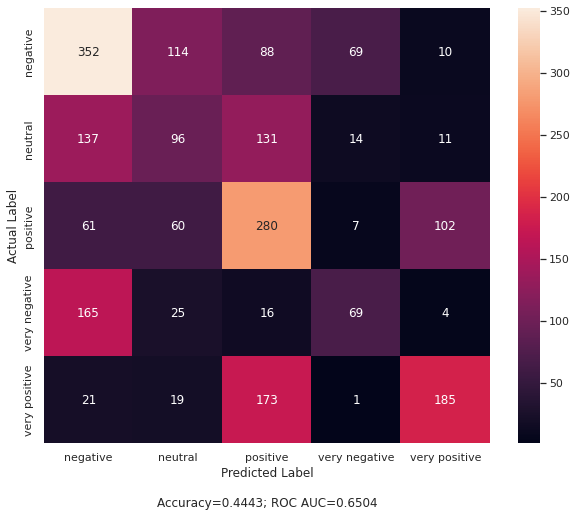

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')

TEST_LABEL = list(test_label)
PREDICTED_LABEL = list(category)
TEST_LABEL_ONE_HOT = test_one_hot_label
PREDICTED_LABEL_ONE_HOT = pred_one_hot_label


labels = list(labelBinary.classes_)

accuracy = accuracy_score(TEST_LABEL, PREDICTED_LABEL)
roc_score = roc_auc_score(PREDICTED_LABEL_ONE_HOT, TEST_LABEL_ONE_HOT)

conf_mat = confusion_matrix(TEST_LABEL, PREDICTED_LABEL)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label\n\nAccuracy={:0.4f}; ROC AUC={:0.4f}'.format(accuracy, roc_score))
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_label, category))

               precision    recall  f1-score   support

     negative       0.48      0.56      0.51       633
      neutral       0.31      0.25      0.27       389
     positive       0.41      0.55      0.47       510
very negative       0.43      0.25      0.31       279
very positive       0.59      0.46      0.52       399

     accuracy                           0.44      2210
    macro avg       0.44      0.41      0.42      2210
 weighted avg       0.45      0.44      0.44      2210



### Prediction for single input

In [ ]:
user_input = test_df.text[0]

In [ ]:
user_input

'a film that takes you inside the rhythms of its subject : you experience it as you watch .'

In [ ]:
# tokenization
maxLength = 49
user_input_sequences = loadToken.texts_to_sequences(np.array([user_input]))
padded_user_input_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    user_input_sequences, maxlen=maxLength)

In [ ]:
padded_user_input_sequences.shape

(1, 49)

In [ ]:
padded_user_input_sequences

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    2,
          13,    9,  246,   20,  641,    1, 1904,    4,   19,  252,   20,
         298,    8,   11,   20,  215]], dtype=int32)

In [ ]:
# predection
pred_ui = loadModel.predict(padded_user_input_sequences)

1/1 [==============================] - 0s 58ms/step


In [ ]:
pred_cat = loadLabel.inverse_transform(pred_ui)

In [ ]:
pred_cat

array(['very positive'], dtype='<U13')

In [ ]:
score_ui = list(pred_ui.max(axis=1))

In [ ]:
score_ui = [float( '{:.2f}'.format(i *100)) for i in score_ui]

In [ ]:
score_ui

[66.21]

In [ ]:
pred_cat[0]

'very positive'

## Prediction

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import pickle

In [ ]:
modelPath = '/content/drive/MyDrive/Sentiment_SST5/Output/sst5_model.h5'
tokenPath = '/content/drive/MyDrive/Sentiment_SST5/Output/token-sst5.pkl'
labelPath = '/content/drive/MyDrive/Sentiment_SST5/Output/label.pkl'

In [ ]:
loadModel= load_model(modelPath)

with open(tokenPath, 'rb') as handle:
    loadToken = pickle.load(handle)

with open(labelPath, 'rb') as handle:
    loadLabel = pickle.load(handle)

In [ ]:
review_input = input()

a film that takes you inside the rhythms of its subject : you experience it as you watch .


In [ ]:
user_input = review_input.lower()

In [ ]:
user_input

'a film that takes you inside the rhythms of its subject : you experience it as you watch .'

In [ ]:
# tokenization
maxLength = 49
user_input_sequences = loadToken.texts_to_sequences(np.array([user_input]))
padded_user_input_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    user_input_sequences, maxlen=maxLength)

In [ ]:
# predection
pred_ui = loadModel.predict(padded_user_input_sequences)

1/1 [==============================] - 3s 3s/step


In [ ]:
pred_cat = loadLabel.inverse_transform(pred_ui)

In [ ]:
pred_cat

array(['very positive'], dtype='<U13')

In [ ]:
score_ui = list(pred_ui.max(axis=1))

In [ ]:
score_ui = [float( '{:.2f}'.format(i *100)) for i in score_ui]

In [ ]:
score_ui

[66.21]

In [ ]:
pred_cat[0],score_ui[0]

('very positive', 66.21)